<a href="https://colab.research.google.com/github/ThomasHaritchet/Preentrega.Data/blob/main/Preentrega1_Haritchet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Obtenci√≥n de los Datos
Para este an√°lisis, utilizamos un dataset de ventas de supermercados disponible en Kaggle: Supermarket Sales.

Para descargar los datos desde Kaggle:

1.Se subi√≥ el archivo de credenciales kaggle.json en Colab.

2.Se utiliz√≥ el comando kaggle datasets download -d aungpyaeap/supermarket-sales para obtener el dataset.

3.Se extrajo el archivo ZIP en un directorio local.

4.Finalmente, se carg√≥ el archivo CSV en un DataFrame de Pandas para su an√°lisis.

üí° Nota: La descarga solo es necesaria la primera vez. Luego, se puede trabajar directamente con el archivo CSV guardado.



#üéØ Abstracto
Motivaci√≥n del An√°lisis
El an√°lisis de datos de ventas de supermercados permite identificar patrones de compra, tendencias de consumo y factores que afectan las ventas. Comprender estos aspectos ayuda a mejorar la toma de decisiones en estrategias de marketing, abastecimiento y fidelizaci√≥n de clientes.

Audiencia Beneficiada:

-Gerentes de supermercados: Para optimizar la gesti√≥n de inventario y promociones.

-Equipos de marketing: Para dise√±ar campa√±as enfocadas en los clientes m√°s rentables.

-Analistas de negocios: Para evaluar el comportamiento de los consumidores y mejorar la rentabilidad.

üìå Objetivo: A trav√©s del an√°lisis exploratorio de datos (EDA) y visualizaciones, buscamos extraer informaci√≥n valiosa para mejorar la estrategia comercial de los supermercados.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thomasharitchet","key":"a59462defaadce7978871cafff6e2011"}'}

In [3]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [5]:
!pip install kaggle


In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [6]:
!kaggle datasets download -d aungpyaeap/supermarket-sales


Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
License(s): other


In [7]:
import zipfile

# Descomprimir el archivo ZIP descargado
with zipfile.ZipFile('supermarket-sales.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/supermarket_sales')  # Extrae el contenido en un directorio

# Verificar los archivos extra√≠dos
import os
os.listdir('/content/supermarket_sales')


['supermarket_sales - Sheet1.csv']

In [10]:
import pandas as pd

# Cargar el archivo CSV (ajustar el nombre si es necesario)
df = pd.read_csv('/content/supermarket_sales/supermarket_sales - Sheet1.csv')

# Ver las primeras filas del dataset
df.head()


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [9]:
import os

# Verificar el contenido de la carpeta donde se descomprimi√≥ el archivo
os.listdir('/content/supermarket_sales')


['supermarket_sales - Sheet1.csv']

In [11]:
# Informaci√≥n general del DataFrame
df.info()

# Descripci√≥n estad√≠stica del DataFrame
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [12]:
# Verificar valores nulos
df.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
# Ver las primeras 10 filas del dataset
df.head(10)

# Ver las √∫ltimas 10 filas del dataset
df.tail(10)


Invoice ID Branch       City Customer type  Gender  \
990  886-18-2897      A     Yangon        Normal  Female   
991  602-16-6955      B   Mandalay        Normal  Female   
992  745-74-0715      A     Yangon        Normal    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
990      Food and beverages       56.56         5  14.1400   296.9400   
991       Sports and travel       76.60        10  38.3000   804.3000   
992  Electronic accessories       58.03         2   5.8030   121.8630   
993     Fashion accessories       17.49        10   8.7450   183.6450   
994  Electronic accessories       60.95         1   3.0475    63.9975   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
990  3/22/2019  19:06  Credit card  282.80                 4.761905   
991  1/24/2019  18:10      Ewallet  766.00                 4.761905   
992  3/10/2019  20:46      Ewallet  116.06                 4.761905   
993  2/22/2019  18:35      Ewallet  174.90                 4.761905   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
990       14.1400     4.5  
991       38.3000     6.0  
992        5.8030     8.8  
993        8.7450     6.6  
994        3.0475     5.9  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6

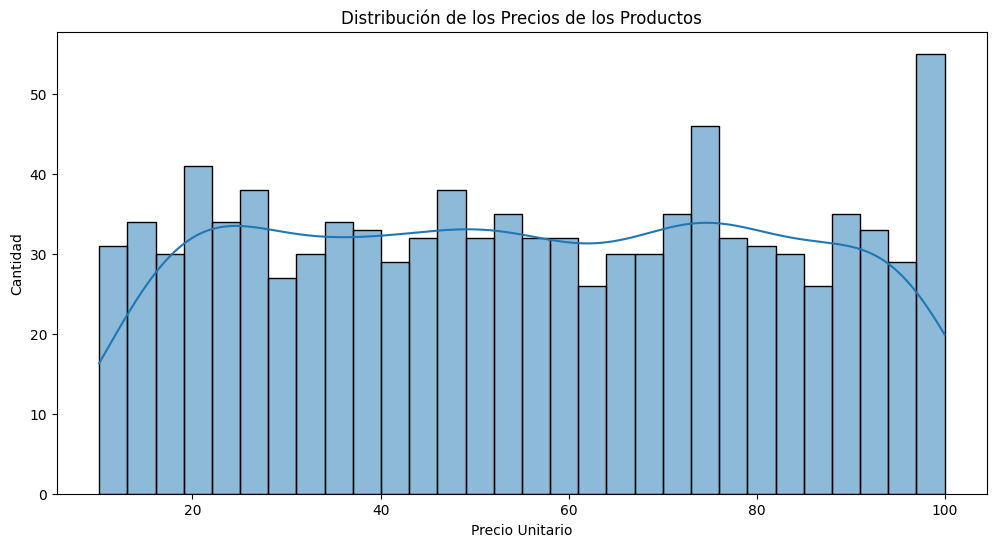

In [39]:
# 1Ô∏è‚É£ Distribuci√≥n de los precios de los productos
plt.figure(figsize=(12, 6))
sns.histplot(df['Unit price'], kde=True, bins=30)
plt.title('Distribuci√≥n de los Precios de los Productos')
plt.xlabel('Precio Unitario')
plt.ylabel('Cantidad')
plt.show()



# üìä An√°lisis: La mayor√≠a de los productos tienen un precio unitario concentrado en cierto rango.
# La distribuci√≥n nos permite ver si hay productos significativamente m√°s caros o baratos.


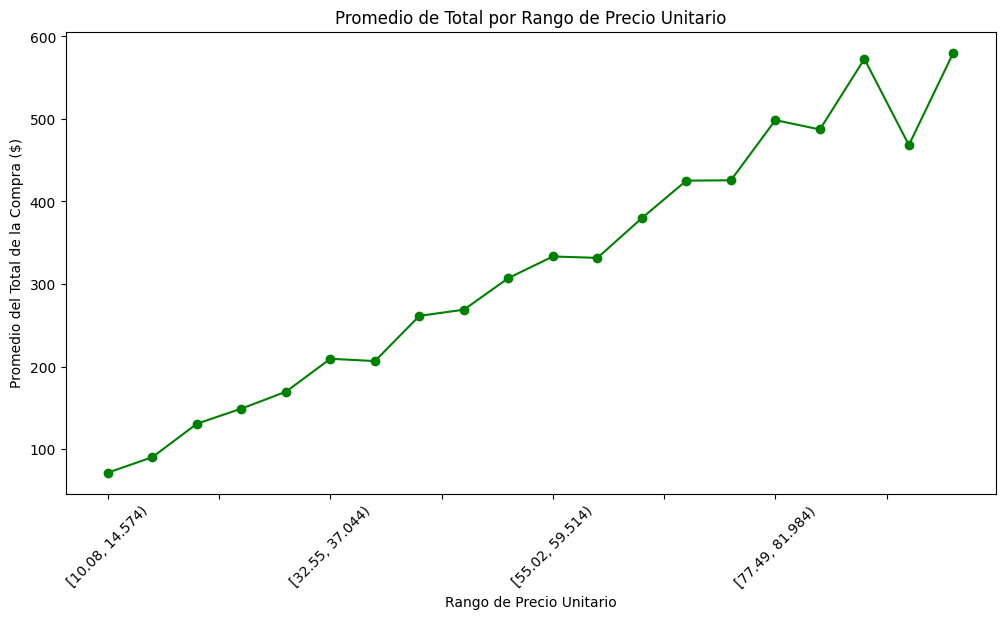

In [40]:
# 2Ô∏è‚É£ Promedio de total por rango de precios
price_bins = pd.cut(df['Unit price'], bins=20, right=False)
price_grouped = df.groupby(price_bins, observed=False)['Total'].mean()

plt.figure(figsize=(12, 6))
price_grouped.plot(kind='line', color='green', marker='o')
plt.title('Promedio de Total por Rango de Precio Unitario')
plt.xlabel('Rango de Precio Unitario')
plt.ylabel('Promedio del Total de la Compra ($)')
plt.xticks(rotation=45)
plt.show()



# üìä An√°lisis: Se observa c√≥mo el total promedio de la compra var√≠a seg√∫n el precio unitario del producto.
# Si hay un rango con compras mucho m√°s altas, puede indicar que ciertos productos de mayor precio generan m√°s ingresos.


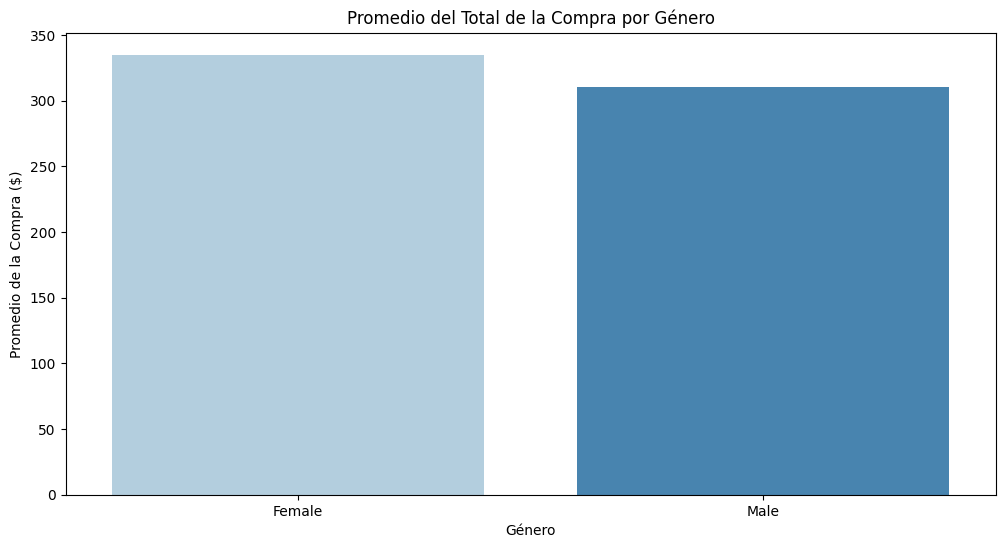

In [45]:
# 3Ô∏è‚É£ Promedio de compra por g√©nero
gender_avg = df.groupby('Gender', observed=False)['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_avg, x="Gender", y="Total", palette='Blues', hue="Gender", legend=False)
plt.title('Promedio del Total de la Compra por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Promedio de la Compra ($)')
plt.show()


# üìä An√°lisis: Este gr√°fico nos indica si hay diferencias en los h√°bitos de compra entre g√©neros.
# Podemos ver si un g√©nero gasta m√°s en promedio por compra.

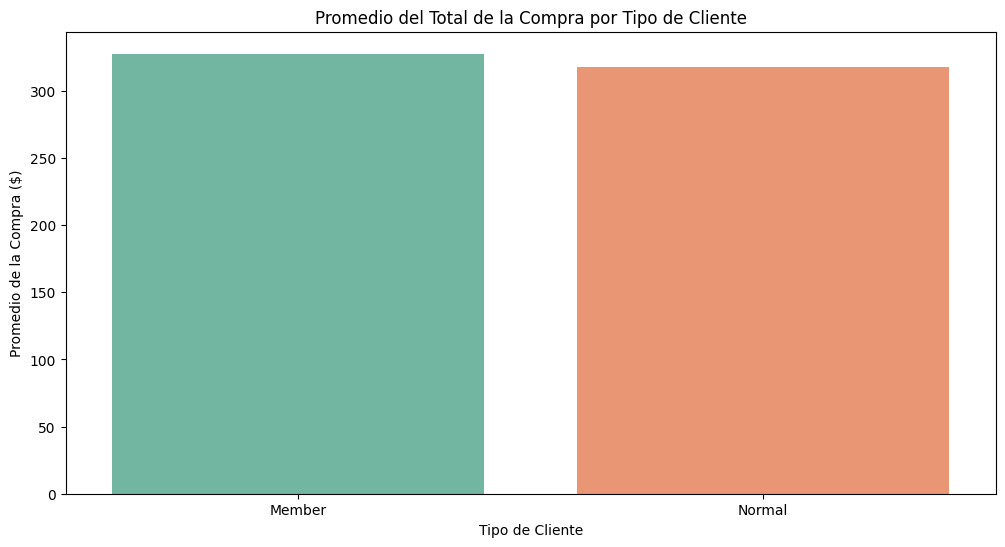

In [52]:
# 4Ô∏è‚É£ Promedio de compra por tipo de cliente
customer_type_avg = df.groupby('Customer type', observed=False)['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_type_avg, x='Customer type', y='Total', hue="Customer type", palette='Set2', legend=False)
plt.title('Promedio del Total de la Compra por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Promedio de la Compra ($)')
plt.legend([],[], frameon=False)
plt.show()


# üìä An√°lisis: Diferencia entre clientes regulares y nuevos. ¬øQui√©n gasta m√°s por compra?
# Si los clientes regulares gastan m√°s, puede ser una oportunidad para estrategias de fidelizaci√≥n

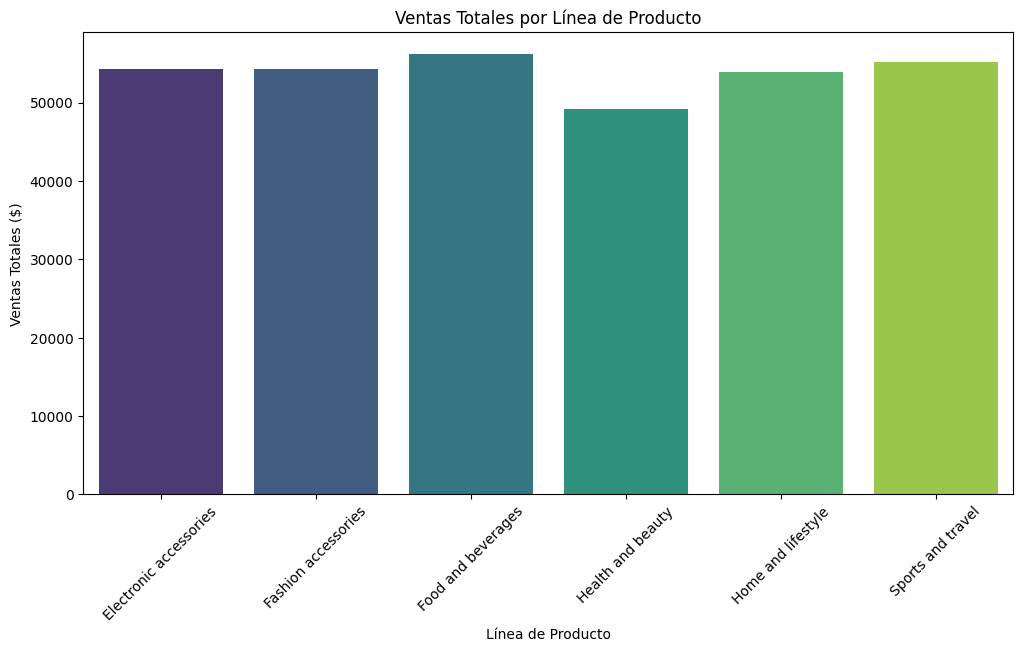

In [51]:
# 5Ô∏è‚É£ Ventas totales por l√≠nea de producto
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x='Product line', y='Total', hue='Product line', palette='viridis', legend=False)
plt.title('Ventas Totales por L√≠nea de Producto')
plt.xlabel('L√≠nea de Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.show()


# üìä An√°lisis: Aqu√≠ identificamos qu√© tipo de productos generan m√°s ventas totales.
# Esto es clave para estrategias de marketing y abastecimiento.

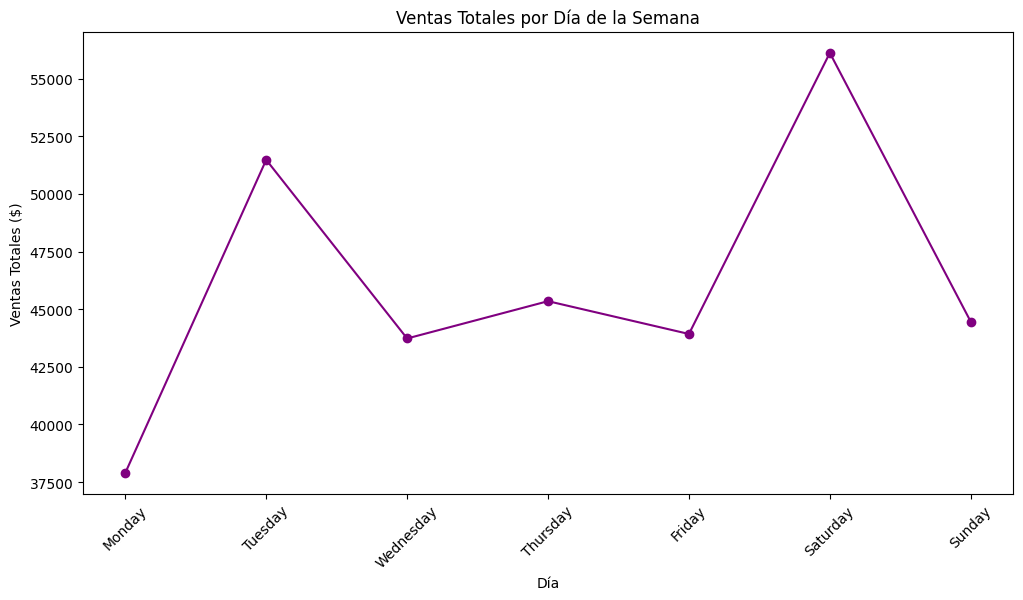

In [48]:
# 6Ô∏è‚É£ Ventas totales por d√≠a (corrigiendo error de la columna 'Day')
df['Date'] = pd.to_datetime(df['Date'])  # Convertimos la fecha a formato datetime
df['Day'] = df['Date'].dt.day_name()  # Extraemos el d√≠a de la semana

daily_sales = df.groupby('Day', observed=False)['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='purple', marker='o')
plt.title('Ventas Totales por D√≠a de la Semana')
plt.xlabel('D√≠a')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.show()




# üìä An√°lisis: Podemos ver en qu√© d√≠as de la semana hay m√°s ventas.
# Si hay d√≠as con muchas m√°s ventas, podr√≠an aprovecharse con promociones o cambios de horario.